In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
import json
from sklearn import preprocessing
%matplotlib inline
from nltk.corpus import stopwords
import contractions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [133]:
df_movie = pd.read_csv("data_movies_v2.csv")
# df_movie

# Looking at Null Values in the Dataset

In [134]:
df_movie.isna().sum()

index                             0
budget                            0
genres                           28
homepage                       3091
id                                0
keywords                        412
original_language                 0
original_title                    0
overview                          3
popularity                        0
production_companies              0
production_countries              0
release_date                      1
revenue                           0
runtime                           2
spoken_languages                  0
status                            0
tagline                         844
title                             0
vote_average                      0
vote_count                        0
cast                             43
crew                              0
director                         30
Drama                             0
Comedy                            0
Thriller                          0
Action                      

# EDA: Most Occuring Terms in Keywords

Keywords are words used to describe a movie and what the movie is related to. The word cloud shows the most occurring terms in the Keywords, which tells us the frequently occurring theme or characteristic of the movie.

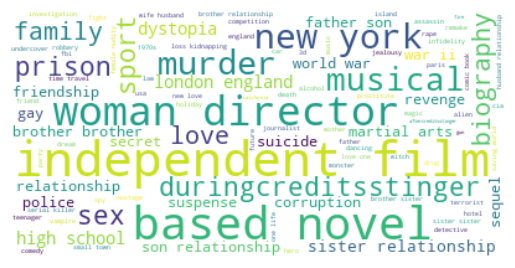

In [135]:
word = []
for x in range(0, len(df_movie)):
    if str(df_movie.keywords[x]) != "nan":
        word = word+str(df_movie.keywords[x]).split()
word
stop_words = set(stopwords.words('english'))
word_wo_stop = []
for x in range(0, len(word)):
    if word[x] not in stop_words:
        word_wo_stop.append(word[x])

text = " ".join(word_wo_stop)
#taken from https://www.datacamp.com/tutorial/wordcloud-python
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Cleaning Step 1: Treating Null in Overview, Keywords and Homepage column.     

There were 3 NULL I values in the overview, 412 NULL values in Keywords, and 3091 in the homepage. Since the overview had only 3 NULL values in the overview, we treated NULL values by removing the rows that had NULL values in the overview. But we couldn't do the same because of this column's high concentration of NULL values. Since the homepage provides links to the movie's homepage, we decided to remove that feature instead of removing the rows. Keywords are the words used to search for the movie, and since they have many NULL values, we decided to remove the column.

Examples of data in original 'genres' column

In [6]:
df_movie.overview.isna().sum()

3

In [7]:
df_movie.keywords.isna().sum()

412

In [8]:
df_movie.homepage.isna().sum()

3091

In [108]:
x=df_movie[df_movie['overview'].isna()]['index']
df_movie=df_movie.drop(x)

In [9]:
df_movie = df_movie.drop(columns='keywords', axis =1)

In [10]:
df_movie = df_movie.drop(columns='homepage', axis =1)
df_movie.head()

,index,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


# Cleaning Step 2: Revenue and Release Status(Post Production and Rumored).

The feature Revenue mentions the money made by the movie. Three unique status labels are Rumored, Post-Production, and Released. In this step, we checked if any of the movies that are labeled movies have a revenue of more than 0. It wouldn’t be correct if the movie has listed revenue when they are not released. Rumored movies didn’t have any instance of it. But post-production had one movie that had revenue more than 0 listed. So, we treated it by checking if the movie had been released by searching online, and it was, so we changed the status to Released.

In [11]:
df_movie.status.value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

In [12]:
df_movie.groupby("status").get_group("Rumored").revenue.sum()

0

In [13]:
df_movie.groupby("status").get_group("Post Production").revenue.sum()

841733

In [14]:
postpd = df_movie.groupby("status").get_group("Post Production")
postpd[postpd["revenue"] > 0].title.unique()

array(['Higher Ground'], dtype=object)

In [15]:
#Revenue for the Post Produuction was not 0, so we looked at the movie that had revenue more than 0 and checked if the movie has been released or not and it was released so we changed the status
df_movie.status['Higher Ground'] = "Released"

C:\Users\jyoth\AppData\Local\Temp\ipykernel_36368\3898853620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie.status['Higher Ground'] = "Released"


# Cleaning Step 3: Removing orginal_title column and keeping Translate title column.

The movies in the dataset are from different countries, so the original title is in a different language. We decided to use the Translated title instead of the original to keep everything in the same language.

In [16]:
df_movie = df_movie.drop(columns='original_title', axis =1)
df_movie.head()

,index,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,285,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,206647,en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,49026,en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,49529,en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


# Cleaning Step 4: Revenue of Released Movies

In this step, we checked if the Revenue of the released movies was more than 0 and since there were movies with 0 revenue listed and since Revenue listed the amount of money earned during the showings and streaming. We treated this by removing the rows with Revenue listed as 0 in the released movies.

In [17]:
#not done yet
released = df_movie.groupby("status").get_group("Released")

In [18]:
released.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4795.000000,4.795000e+03,4795.000000,4795.000000,4.795000e+03,4793.000000,4795.000000,4795.000000
mean,2397.908655,2.909267e+07,57051.887800,21.527415,8.239771e+07,106.915084,6.093306,691.360792
std,1385.559888,4.073962e+07,88593.489117,31.831547,1.629583e+08,22.570343,1.190313,1235.298140
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1198.500000,8.000000e+05,9010.500000,4.723880,0.000000e+00,94.000000,5.600000,54.000000
50%,2397.000000,1.500000e+07,14585.000000,12.963328,1.925587e+07,104.000000,6.200000,236.000000
75%,3596.500000,4.000000e+07,58533.000000,28.352222,9.311911e+07,118.000000,6.800000,738.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [19]:
released_Budget_Zero = released[released.revenue == 0]
released_Budget_Zero.head()

,index,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
83,83,27000000,Action Adventure Science Fiction Romance,79698,en,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34,Josh Hartnett Simone Kessell Tamsin Egerton Al...,"[{'name': 'Terry Ryan', 'gender': 0, 'departme...",Roland Joff\u00e9
135,135,150000000,Drama Horror Thriller,7978,en,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,Benicio del Toro Anthony Hopkins Emily Blunt H...,"[{'name': 'Walter Murch', 'gender': 2, 'depart...",Joe Johnston
265,265,0,Comedy Fantasy Family,10588,en,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366,Mike Myers Dakota Fanning Spencer Breslin Kell...,"[{'name': 'Eric McLeod', 'gender': 2, 'departm...",Bo Welch
309,309,84000000,Fantasy Comedy Family Adventure,10214,en,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who's next?,Son of the Mask,3.6,338,Jamie Kennedy Alan Cumming Traylor Howard Kal ...,"[{'name': 'Greg Gardiner', 'gender': 2, 'depar...",Lawrence Guterman
376,376,90000000,Science Fiction Action Drama Thriller,10357,en,An earthquake shatters a peaceful Los Angeles ...,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,The coast is toast,Volcano,5.2,376,Tommy Lee Jones Anne Heche Gaby Hoffmann Don C...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Mick Jackson


In [20]:
df_movie= df_movie.drop(released[released.revenue == 0].index)

In [21]:
df_movie['release_date'].isna().sum()
df_movie['year'] = pd.DatetimeIndex(df_movie['release_date']).year
df_movie['month'] = pd.DatetimeIndex(df_movie['release_date']).month
df_movie['year'] = df_movie['year'].astype(int)
df_movie['month']=df_movie['month'].astype(int)

# EDA 1: Overview Sentiment Analysis

The overview of the movies is supposed to be neutral and not opinionated. We did sentiment analysis on overview to check the sentiment and how opinionated. It is understood that the mean is 0.042329 with a standard deviation of 0.21. This tells us a good amount of overview is almost neutral, and more overviews have a positive than negative sentiment. We also did a Subjectivity analysis and found that overviews are more opinionated than factual or neither, as the mean is 0.46764 and the standard deviation is 0.22.

In [22]:
#taken from https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

def getSubjectivity(text):

   return TextBlob(str(text)).sentiment.subjectivity
  
 #Create a function to get the polarity
def getPolarity(text):
   return TextBlob(str(text)).sentiment.polarity


In [23]:
subjective = df_movie.overview.apply(getSubjectivity)
sentiment = df_movie.overview.apply(getPolarity)
df_movie["sentiment"] = sentiment
df_movie["subjective"] = subjective

In [24]:
df_movie["sentiment"].describe()

count    3383.000000
mean        0.040660
std         0.219538
min        -1.000000
25%        -0.066667
50%         0.033333
75%         0.162500
max         1.000000
Name: sentiment, dtype: float64

Text(0, 0.5, 'Count')

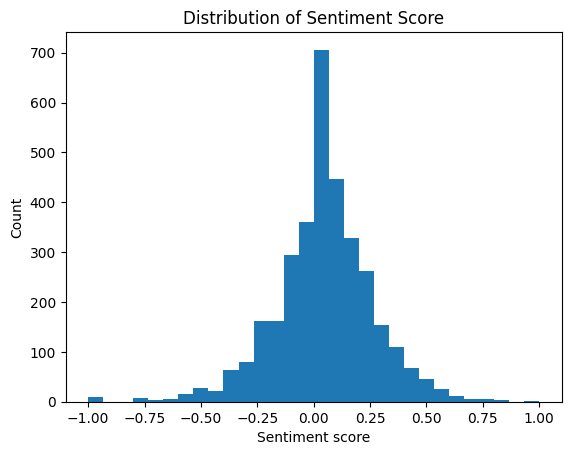

In [48]:
plt.hist(df_movie["sentiment"], linewidth = 0.5, bins=30)
plt.title("Distribution of Sentiment Score")
plt.xlabel("Sentiment score")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

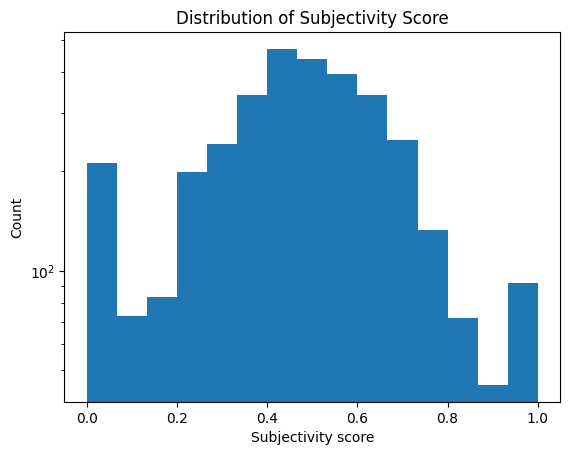

In [50]:
plt.hist(df_movie["subjective"], linewidth = 0.5, bins=15, log =True)
plt.xlabel("Subjectivity score")
plt.title("Distribution of Subjectivity Score")
plt.ylabel("Count")

In [27]:
df_movie.subjective.describe()

count    3383.000000
mean        0.469176
std         0.221345
min         0.000000
25%         0.337184
50%         0.477778
75%         0.606871
max         1.000000
Name: subjective, dtype: float64

# EDA 2: Popularity

We first used describe() to get the mean, std, min, values in each quartile, and max values. Mean was 28.608220, and standard deviation was 35.60820, suggesting that the data is more spread out. We plotted a histogram to check the distribution of popularity. The Y-axis is log-scaled, and many movies are not very popular. We also checked the average popularity of movies in each month of the year, and from the graph, the popularity of movies is higher during the months of June, May, and July, which are the summer months. A scatter plot was plotted to see how revenue is related to popularity. We can see that the popularity is higher when there is higher revenue. Although there are outliers that have smaller revenue, they are more popular, and vice versa.

In [28]:
df_movie.popularity.describe()

count    3383.000000
mean       28.202567
std        35.608220
min         0.010909
25%         9.875586
50%        19.747459
75%        36.378394
max       875.581305
Name: popularity, dtype: float64

Text(0, 0.5, 'Count')

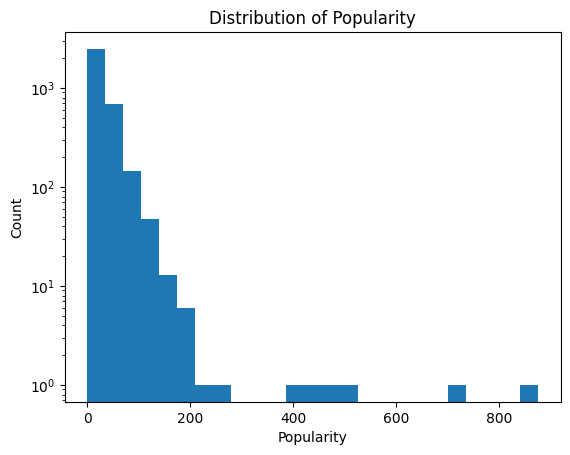

In [51]:
plt.hist(df_movie["popularity"], linewidth = 0.5, bins=25, log= True)
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")

Text(0, 0.5, 'Popularity')

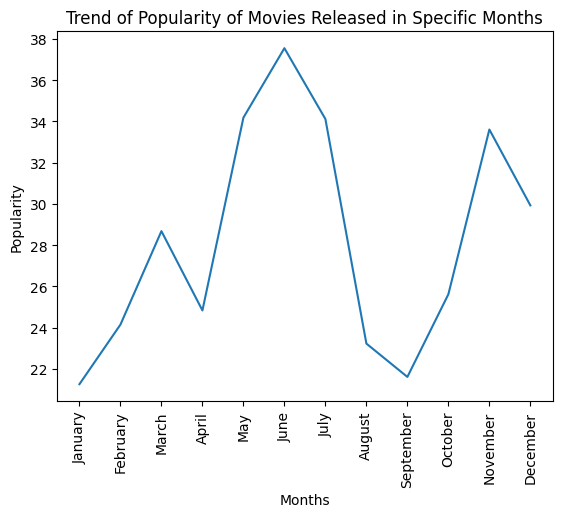

In [52]:
y_point= []
for x in range(1,13):
    y_point.append(df_movie.groupby("month").get_group(x).popularity.mean())

Label= ["January", "February","March","April","May","June","July", "August","September","October","November","December"]
x_point = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(x_point, y_point)
plt.xticks(x_point, Label, rotation='vertical')
plt.title("Trend of Popularity of Movies Released in Specific Months")
plt.xlabel("Months")
plt.ylabel("Popularity")

C:\Users\jyoth\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Revenue')

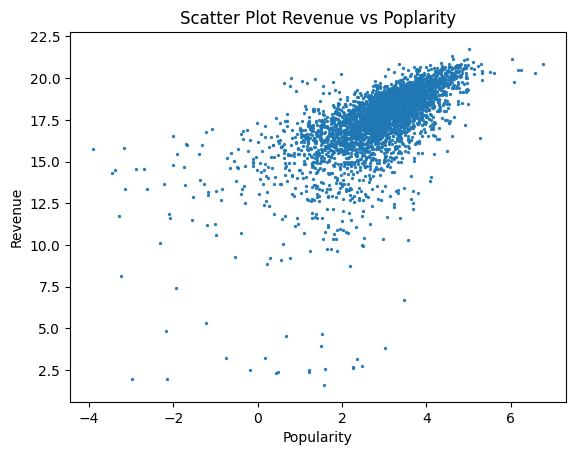

In [53]:
y = np.log(df_movie.revenue, dtype='float64')
x = np.log(df_movie.popularity, dtype='float64')
plt.scatter(x = x, y= y, alpha= 0.9, s= 2)
plt.title("Scatter Plot Revenue vs Poplarity")
plt.xlabel("Popularity")
plt.ylabel("Revenue")

Text(0, 0.5, 'Vote Average')

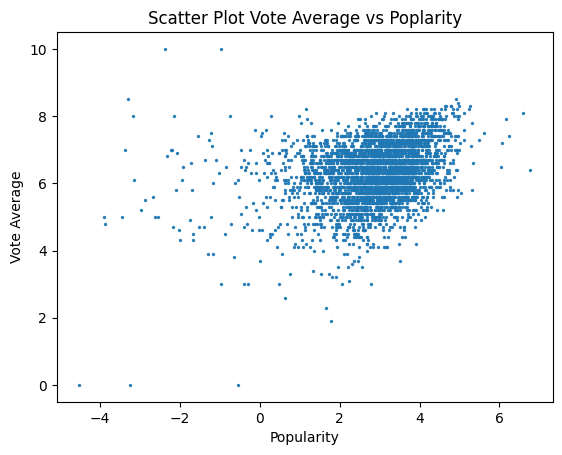

In [54]:
x = np.log(df_movie.popularity, dtype='float64')
plt.scatter(x, y= df_movie.vote_average, alpha= 0.9, s= 2)
plt.title("Scatter Plot Vote Average vs Poplarity")
plt.xlabel("Popularity")
plt.ylabel("Vote Average")

# EDA 3: Status

Status has three unique values: Released, Rumored, and Post-production. Released movies have the highest frequency in the data set. We plotted a scatter plot for each category between vote count and popularity. We can see that in Popularity increases as the vote count increases, but for Rumore and Post-Production, that is not the case popularity is not related to the Vote count.

In [33]:
df_movie.status.unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [34]:
df_movie.status.describe()

count         3383
unique           3
top       Released
freq          3375
Name: status, dtype: object

C:\Users\jyoth\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'Popularity')

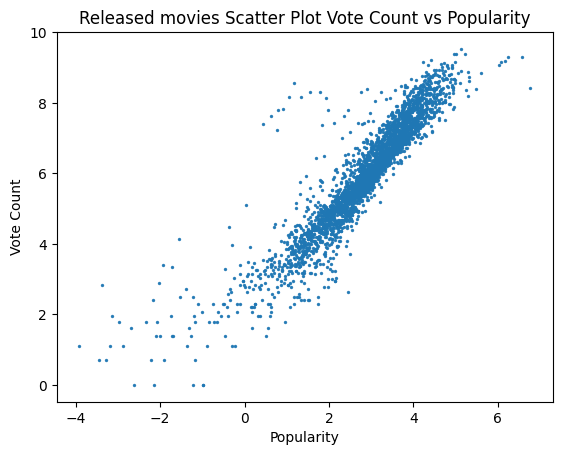

In [55]:
released = df_movie.groupby("status").get_group("Released")
y = np.log(released.vote_count, dtype='float64')
x = np.log(released.popularity, dtype='float64')
plt.scatter(x, y, alpha= 0.9, s= 2)
plt.title("Released movies Scatter Plot Vote Count vs Popularity")
plt.ylabel("Vote Count")
plt.xlabel("Popularity")

Text(0, 0.5, 'Vote Count')

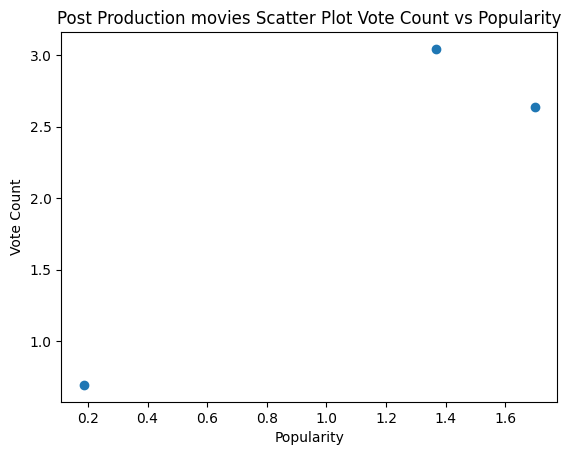

In [137]:
released= df_movie.groupby("status").get_group("Post Production")
y = np.log(released.vote_count, dtype='float64')
x = released.popularity
plt.scatter(x, y)
plt.title("Post Production movies Scatter Plot Vote Count vs Popularity")
plt.xlabel("Popularity")
plt.ylabel("Vote Count")

C:\Users\jyoth\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Popularity')

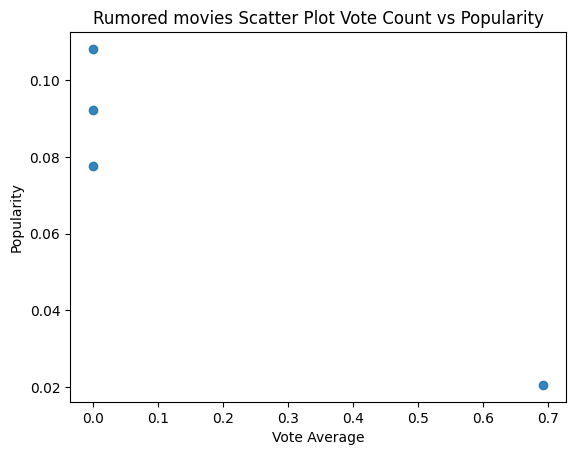

In [136]:
released = df_movie.groupby("status").get_group("Rumored")
y = released.popularity
x = np.log(released.vote_count, dtype='float64')
plt.scatter(x, y, alpha= 0.9)
plt.title("Rumored movies Scatter Plot Vote Count vs Popularity")
plt.xlabel("Vote Average")
plt.ylabel("Popularity")

# EDA 4: Vote Average

Vote Average is the average ratings of the user, and vote count represents the no. of people who voted. The movies have an average rating of 6.31, as seen when running describe(), with a standard variation of 0.892. We plotted a histogram to see the distribution, and it can be seen the majority of data is concentrated near the average of 6.3. From the bar plot that calculates the vote average per month, it can be seen the movies released during the months of December and May have a higher vote average than other months.

In [38]:
df_movie.vote_average.describe()

count    3383.000000
mean        6.306917
std         0.891748
min         0.000000
25%         5.800000
50%         6.300000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64

Text(0, 0.5, 'Vote average')

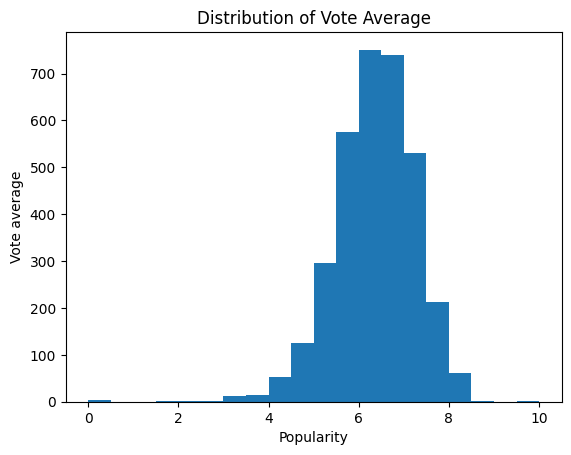

In [57]:
plt.hist(df_movie["vote_average"], linewidth = 0.5, bins=20)
plt.title("Distribution of Vote Average")
plt.xlabel("Popularity")
plt.ylabel("Vote average")


Text(0, 0.5, 'Vote Average')

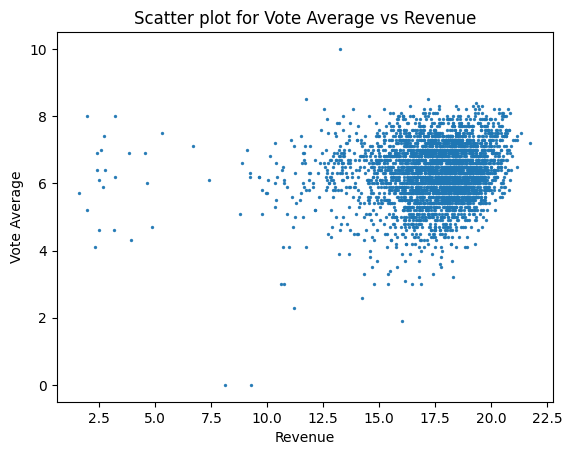

In [67]:
y = df_movie.vote_average
x = np.log(df_movie.revenue, dtype='float64')
plt.scatter(x , y, alpha= 0.9, s =2)
plt.title("Scatter plot for Vote Average vs Revenue")
plt.xlabel("Revenue")
plt.ylabel("Vote Average")

Text(0, 0.5, 'Vote Average')

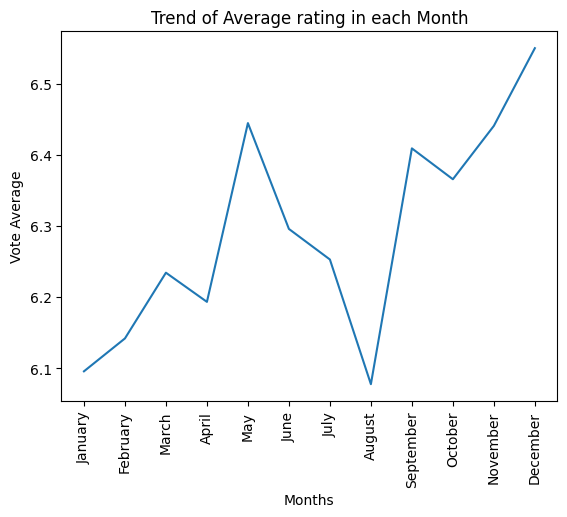

In [61]:
y_point= []
for x in range(1,13):
    y_point.append(df_movie.groupby("month").get_group(x).vote_average.mean())

Label= ["January", "February","March","April","May","June","July", "August","September","October","November","December"]

x_point = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(x_point, y_point)
plt.xticks(x_point, Label, rotation='vertical')
plt.title("Trend of Average rating in each Month")
plt.xlabel("Months")
plt.ylabel("Vote Average")

As part of EDA we created a line plot to look at the trend of what the average revenue for the movie in each month. We can see the average revenue is the lowest in September and January month in our dataset.

Text(0, 0.5, 'Revenue')

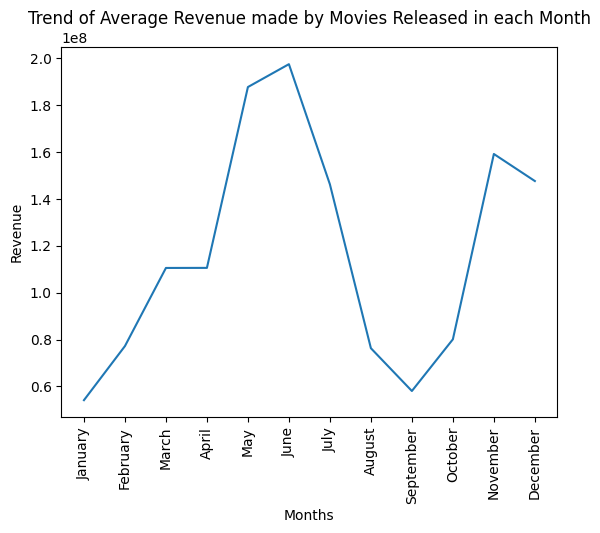

In [65]:
y_point= []
for x in range(1,13):
    y_point.append(df_movie.groupby("month").get_group(x).revenue.mean())

Label= ["January", "February","March","April","May","June","July", "August","September","October","November","December"]
x_point = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(x_point, y_point)
plt.xticks(x_point, Label, rotation='vertical')
plt.title("Trend of Average Revenue made by Movies Released in each Month")
plt.xlabel("Months")
plt.ylabel("Revenue")